In [1]:
import pandas as pd 
from matplotlib import pyplot as plt 
import numpy as np

In [2]:
%ls

Base Prediction.ipynb
Clustering.ipynb
Combined Audio and Popularity.csv
Data Merge.ipynb
Weekly Charts/
a_level_artists.csv
a_level_artists.xlsx
max popularity by track.csv
new Sep test tracks.csv
spotify_competitor_tracks-updated_sep14.csv
spotify_competitor_tracks-updated_sep14.xlsx
weekly viral & top 200.csv


In [3]:
max_pop=pd.read_csv("max popularity by track.csv")
max_pop.head()

/Users/sunevan/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,track_id,track_external_id,max_popularity
0,3iI3pi9bAFrDW74UxyzMJ0,DEC611100411,30
1,7FPXqN2DDiG5JASUjEi8Ua,ARG991022790,13
2,1SHeg1buNhS90Uak8gsx9A,ARW251100615,27
3,6b5rCLd1UslE8cU1pfk4d0,ATN261562301,39
4,3Q85163sbHgeXmnQUCbkQk,BEB018070417,5


In [4]:
#max_pop[max_pop["max_popularity"]=='\\N'].head()

In [5]:
max_pop.head()
max_pop["max_popularity"].replace("\\N","-1",inplace=True)
max_pop["max_popularity"]= max_pop["max_popularity"].fillna(0)
max_pop["max_popularity"]= max_pop["max_popularity"].astype(int)

In [6]:
#max_pop[max_pop["max_popularity"]<10].shape

In [7]:
#max_pop[max_pop["max_popularity"]>0]

In [8]:
audio = pd.read_excel("spotify_competitor_tracks-updated_sep14.xlsx",sheetname="spotify_competitor_tracks")

In [9]:
audio.ISRC=audio.ISRC.astype(str)

In [10]:
max_pop[max_pop.duplicated(subset="track_external_id")]

,track_id,track_external_id,max_popularity
1479,3rIlSv7AY42OCkvj1F13DZ,MXF399601828,20
3815,4oM3LZIFBlJkopiXIU0vXK,GBR8R1700327,32
5249,4fDeZE19QrsdI5HZ6ftx3G,JPE871802726,19
6489,4np5O1X6irEydotrvuXw0w,GBCFB0903500,0
7875,3dHwEjFFsFw5YXtCga9UdU,SEVVQ1100103,0
8567,1MydERaT8BfDkMSwfLK6vJ,CAP431701418,43
9025,0hEpKsTQv2uyacQ1y5hN7M,GBKQU1342693,0
9371,0sUPUKFtNOaKDzi38FH4XY,GBGRH1100033,24
9617,0wEz2Xreivva0TJ2gMdbn8,ITDF61599911,47
10429,7tuAcN0OfmtpN5RyTGwXm7,USCA29800477,29


In [11]:
max_pop[max_pop.track_external_id=='USATO1600796']

,track_id,track_external_id,max_popularity
5123,3jt29C1XmzoA1peNFGlVxp,USATO1600796,28
13341,3HoES9fsEwpJATrGyPzncJ,USATO1600796,44
60107,1PeY7UcO6qNOvCYl8SapIi,USATO1600796,49
1213913,1th4GA5Cxpi8FD1QnblmW1,USATO1600796,50
1213914,4u5iOf7Kl6U7JlVhQ31zmA,USATO1600796,16
1245066,6BtTSL0bryhizTt1rGHyf7,USATO1600796,21
1341133,57o7wITu3TbMByDmOSZthh,USATO1600796,46
1858879,5XuO7t0VNZF4ZPdAECObSe,USATO1600796,35
2172193,2vXfI7WJEvkuRKFmYoWcRD,USATO1600796,33


In [12]:
audio[audio.ISRC=="USATO1600796"]

,ISRC,SPOTIFY_ID,TITLE,ARTIST,TEMPO,ENERGY,DANCE,LOUD,VALENCE,ACOUSTIC,SPEECHINESS,INSTRUMENTALNESS,KEY,LIVENESS,TIME_SIGNATURE,MODE,POP,Seconds,Lean-Back


In [13]:
audio[audio.ISRC.isin(set(max_pop[max_pop.duplicated(subset="track_external_id")]["track_external_id"]))==True].sort_values(by="ISRC")

,ISRC,SPOTIFY_ID,TITLE,ARTIST,TEMPO,ENERGY,DANCE,LOUD,VALENCE,ACOUSTIC,SPEECHINESS,INSTRUMENTALNESS,KEY,LIVENESS,TIME_SIGNATURE,MODE,POP,Seconds,Lean-Back
245167,AEA751400299,6EQN2Oc2whbvazwKFGI4Ot,Fakihat al hob,Kadim Al Sahir,71.497,0.2990,0.2820,-9.161,0.3420,0.786000,0.0300,0.000000,0,0.2080,3,0,24,268333,0
376946,AEAB29900005,03oJtxgZ6VdcqE5fhru2WS,Foug El Nakhal,Ilham al-Madfai,144.296,0.7620,0.7210,-8.886,0.9470,0.606000,0.0339,0.003130,2,0.0928,4,0,15,378373,0
456241,AEAB29900011,4xPBlKNWcB9XDM4vKwMprk,The Bazringosh Song (Hina),Ilham al-Madfai,134.970,0.7180,0.6780,-8.188,0.8270,0.530000,0.0320,0.000002,2,0.3700,3,0,10,416653,0
487544,AEUM71700166,27V9Rx95HhrP1Uhvwf2pUi,Deathless,Ostura,97.636,0.8970,0.2640,-4.489,0.2160,0.006930,0.1310,0.000269,11,0.4800,4,1,8,390346,0
281822,AEUM71800024,3HDBESLgINvgYm5PTZpn3D,Chewed Up,Saffron,82.002,0.5500,0.7070,-6.748,0.4890,0.425000,0.0909,0.082700,4,0.0643,4,0,21,171402,0
393985,AEUM71800035,2MvB449fTvOBJC8unBOVr0,Messed It Up,Shaun Warner,114.943,0.6030,0.7540,-5.921,0.4090,0.028000,0.0415,0.000000,7,0.1160,4,1,14,170000,0
351522,AEUM71800065,6z1EXoUEbN4x2UbEDox9xu,Heart Is A Liar - Haelion Remix,Jai Nova,114.970,0.6330,0.7070,-10.125,0.2170,0.018600,0.0299,0.009720,9,0.4540,4,1,16,230000,0
108185,ALA091700008,4RvAWuTe9Vi9jpwMP2xQXa,Hatixhe,Mixey Ft. Capital T,108.985,0.7610,0.7930,-6.474,0.4360,0.009460,0.0388,0.000527,7,0.1220,4,0,36,192731,0
380080,AR0YS1800002,2vr5uR8a5nBFEIwk0zpgep,MaratÃ³n Suicida,Se Va el Camello,162.940,0.8010,0.5020,-5.845,0.5280,0.051400,0.0413,0.000005,9,0.0957,4,1,15,216634,0
220079,AR2F81700010,0wteojJAvTfutTxdF0ftgW,Tam-Bien,Jvlian,120.166,0.5710,0.6000,-9.085,0.2500,0.006600,0.0578,0.000008,2,0.1520,4,1,26,206500,0


In [14]:
print(max_pop.shape[0])
print(len(set(max_pop["track_external_id"])))

2458710
2097466


In [15]:
print(audio.shape[0])
print(len(set(audio.ISRC)))

616631
616566


In [16]:
audio[audio.ISRC=="USLD91713586"]

,ISRC,SPOTIFY_ID,TITLE,ARTIST,TEMPO,ENERGY,DANCE,LOUD,VALENCE,ACOUSTIC,SPEECHINESS,INSTRUMENTALNESS,KEY,LIVENESS,TIME_SIGNATURE,MODE,POP,Seconds,Lean-Back
220910,USLD91713586,5GRDZ7LL6zj6OqaCoNmwsq,Kalbinden Vur,Bankai Project,92.025,0.814,0.706,-8.363,0.133,0.0573,0.112,0.0,1,0.076,4,1,26,210875,0
222237,USLD91713586,11PHWf2p5fRRuP1PyGT81u,Kalbinden Vur,Bankai Project,92.025,0.814,0.706,-8.363,0.133,0.0573,0.112,0.0,1,0.076,4,1,26,210875,0


In [17]:
audio[audio.duplicated(subset="ISRC")==True].sort_values(by='ISRC').head()

,ISRC,SPOTIFY_ID,TITLE,ARTIST,TEMPO,ENERGY,DANCE,LOUD,VALENCE,ACOUSTIC,SPEECHINESS,INSTRUMENTALNESS,KEY,LIVENESS,TIME_SIGNATURE,MODE,POP,Seconds,Lean-Back
166271,AULI01713550,2uWAfeJAGB6M98K9UJbKX0,Blood,City Calm Down,175.016,0.873,0.389,-5.759,0.258,0.00337,0.1060,0.04630,11,0.100,4,1,30,259595,0
226980,BXBPF1700001,4Z1DRMny2CZ8wmHgVApQaM,Canudo,Douglas e Henrique,129.749,0.563,0.701,-7.819,0.801,0.71100,0.2900,0.00000,7,0.292,4,1,25,185766,0
73342,CA5KR1809310,5IhYi7Dq247vMoGPQoAhzq,Rave,Parker,144.910,0.982,0.565,-1.335,0.281,0.09140,0.0896,0.73700,4,0.234,4,0,40,172137,0
354816,CA6D21800101,0G5XDrOZIJFTUan9IDyPqd,#195 - Monstercat: Call of the Wild,Monstercat,107.560,0.853,0.454,-3.375,0.294,0.02330,0.1180,0.00386,8,0.903,4,1,16,3658184,0
25135,CABD61705401,42lrhaZzqJqCYHlfQTGozP,Everything Is Alright,The Glorious Sons,128.880,0.725,0.564,-3.858,0.242,0.00459,0.0332,0.00000,9,0.110,4,0,51,193325,0


In [18]:
audio.head()

,ISRC,SPOTIFY_ID,TITLE,ARTIST,TEMPO,ENERGY,DANCE,LOUD,VALENCE,ACOUSTIC,SPEECHINESS,INSTRUMENTALNESS,KEY,LIVENESS,TIME_SIGNATURE,MODE,POP,Seconds,Lean-Back
0,USCM51800207,0h1W19pS59KtEd7aDzF58i,In My Feelings,Drake,91.022,0.619,0.833,-5.822,0.366,0.0496,0.0971,0.000087,8,0.300,4,1,100,217925,0
1,USUM71710097,29VZKgZvAjFRxxBnctjqOn,rockstar,Post Malone,159.706,0.503,0.552,-6.759,0.141,0.1380,0.1450,0.000555,5,0.143,4,0,100,218480,0
2,USUM71805184,3AISCGqWZmb6UPxoYrXaA9,Better Now,Post Malone,145.051,0.579,0.686,-5.813,0.352,0.3340,0.0442,0.000000,10,0.135,4,1,100,231266,0
3,USCM51800078,7liAO2OqrFMVvM7oiLo0m0,Nice For What,Drake,186.885,0.899,0.603,-6.558,0.813,0.1050,0.1410,0.000431,8,0.106,4,1,100,210925,0
4,USCM51800005,61T2H6w0ggQdhCvVegLl99,God's Plan,Drake,77.175,0.451,0.758,-9.454,0.353,0.0273,0.1040,0.000095,7,0.566,4,1,100,198960,0


In [19]:
max_pop.head()

,track_id,track_external_id,max_popularity
0,3iI3pi9bAFrDW74UxyzMJ0,DEC611100411,30
1,7FPXqN2DDiG5JASUjEi8Ua,ARG991022790,13
2,1SHeg1buNhS90Uak8gsx9A,ARW251100615,27
3,6b5rCLd1UslE8cU1pfk4d0,ATN261562301,39
4,3Q85163sbHgeXmnQUCbkQk,BEB018070417,5


In [22]:
#combine = pd.merge(audio,max_pop,how='left',left_on='SPOTIFY_ID',right_on='track_id')

In [23]:
#combine[combine.max_popularity.isnull()==True].shape

(3858, 22)

In [24]:
#combine[combine.max_popularity.isnull()==False].shape

(613149, 22)

In [20]:
combine2 = pd.merge(audio,max_pop,how='left',left_on='ISRC',right_on='track_external_id')

In [21]:
combine2[combine2.max_popularity.isnull()==True].shape

(2726, 22)

In [27]:
# drop duplicate audio features & keep highest popluarity 

In [22]:
print(audio.shape[0])
audio = audio.drop_duplicates(subset="ISRC")
print(audio.shape[0])

616631
616566


In [23]:
max_pop.head()

,track_id,track_external_id,max_popularity
0,3iI3pi9bAFrDW74UxyzMJ0,DEC611100411,30
1,7FPXqN2DDiG5JASUjEi8Ua,ARG991022790,13
2,1SHeg1buNhS90Uak8gsx9A,ARW251100615,27
3,6b5rCLd1UslE8cU1pfk4d0,ATN261562301,39
4,3Q85163sbHgeXmnQUCbkQk,BEB018070417,5


In [24]:
max_pop[max_pop.track_external_id=='USATO1600796']

,track_id,track_external_id,max_popularity
5123,3jt29C1XmzoA1peNFGlVxp,USATO1600796,28
13341,3HoES9fsEwpJATrGyPzncJ,USATO1600796,44
60107,1PeY7UcO6qNOvCYl8SapIi,USATO1600796,49
1213913,1th4GA5Cxpi8FD1QnblmW1,USATO1600796,50
1213914,4u5iOf7Kl6U7JlVhQ31zmA,USATO1600796,16
1245066,6BtTSL0bryhizTt1rGHyf7,USATO1600796,21
1341133,57o7wITu3TbMByDmOSZthh,USATO1600796,46
1858879,5XuO7t0VNZF4ZPdAECObSe,USATO1600796,35
2172193,2vXfI7WJEvkuRKFmYoWcRD,USATO1600796,33


In [25]:
max_pop = max_pop.sort_values(['track_external_id', 'max_popularity'], ascending=[True, False])
max_pop = max_pop.drop_duplicates(subset="track_external_id",keep='first')

In [26]:
max_pop[max_pop.track_external_id=='USATO1600796']

,track_id,track_external_id,max_popularity
1213913,1th4GA5Cxpi8FD1QnblmW1,USATO1600796,50


In [36]:
combine2 = pd.merge(audio,max_pop,how='left',left_on='ISRC',right_on='track_external_id')

In [37]:
combine2 = combine2[combine2.max_popularity.isnull()==False]

In [39]:
combine2.to_csv("Combined Audio and Popularity.csv",index=False)

In [38]:
len(set(combine2["ISRC"]))

613841

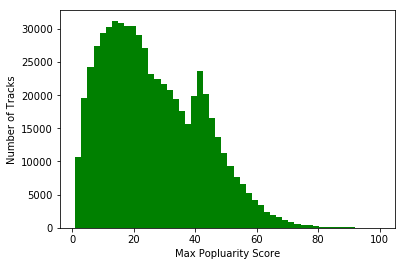

In [40]:
plt.hist(combine2[combine2["max_popularity"]>0]["max_popularity"],bins=50,color="Green")
plt.xlabel('Max Popluarity Score')
plt.ylabel("Number of Tracks")
plt.show()

In [41]:
artist = pd.read_excel("a_level_artists.xlsx",sheetname="full_result_188795846")

In [42]:
artist.head()

,artist_id,artist_name,number_of_tracks,number_of_albums,number_of_playlists,playlist_followers,highest_song_popularity,average_song_popularity,A_Level_Artist?,B_Level Artist?
0,3TVXtAsR1Inumwj472S9r4,Drake,263,255,39875,710070329,100,55.859119,1,0
1,6LuN9FCkKOj5PcnpouEgny,Khalid,46,56,13841,378377698,98,75.597498,0,1
2,3wyVrVrFCkukjdVIdirGVY,Lil Pump,34,32,6003,191866217,98,68.586418,0,1
3,1OAjDaKgg00KCUYqDe68un,Gigi D'Agostino,184,94,3243,130813283,97,64.911651,0,0
4,0Y5tJX1MQlPlqiwlOH1tJY,Travis Scott,122,107,16642,299194507,97,68.611220,1,0


In [43]:
combine2.head()

,ISRC,SPOTIFY_ID,TITLE,ARTIST,TEMPO,ENERGY,DANCE,LOUD,VALENCE,ACOUSTIC,...,KEY,LIVENESS,TIME_SIGNATURE,MODE,POP,Seconds,Lean-Back,track_id,track_external_id,max_popularity
0,USCM51800207,0h1W19pS59KtEd7aDzF58i,In My Feelings,Drake,91.022,0.619,0.833,-5.822,0.366,0.0496,...,8,0.300,4,1,100,217925,0,0h1W19pS59KtEd7aDzF58i,USCM51800207,62.0
1,USUM71710097,29VZKgZvAjFRxxBnctjqOn,rockstar,Post Malone,159.706,0.503,0.552,-6.759,0.141,0.1380,...,5,0.143,4,0,100,218480,0,29VZKgZvAjFRxxBnctjqOn,USUM71710097,63.0
2,USUM71805184,3AISCGqWZmb6UPxoYrXaA9,Better Now,Post Malone,145.051,0.579,0.686,-5.813,0.352,0.3340,...,10,0.135,4,1,100,231266,0,3AISCGqWZmb6UPxoYrXaA9,USUM71805184,67.0
3,USCM51800078,7liAO2OqrFMVvM7oiLo0m0,Nice For What,Drake,186.885,0.899,0.603,-6.558,0.813,0.1050,...,8,0.106,4,1,100,210925,0,7liAO2OqrFMVvM7oiLo0m0,USCM51800078,69.0
4,USCM51800005,61T2H6w0ggQdhCvVegLl99,God's Plan,Drake,77.175,0.451,0.758,-9.454,0.353,0.0273,...,7,0.566,4,1,100,198960,0,61T2H6w0ggQdhCvVegLl99,USCM51800005,73.0


In [57]:
a_artist = list(set(artist[artist["A_Level_Artist?"]==1]["artist_name"]))

In [63]:
combine2[combine2["ARTIST"].isin(a_artist)==True].shape

(303, 22)